In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_prediction/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [8]:
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
df.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [10]:
empty_size_rows = df[df['size'] == '']
nan_size_rows = df[df['size'].isnull()]
all_empty_size_rows = pd.concat([empty_size_rows, nan_size_rows])
display(all_empty_size_rows)

,location,size,total_sqft,bath,price
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
1775,IVC Road,NaN,2000 - 5634,NaN,124.000
2264,Banashankari,NaN,2400,NaN,460.000
2809,Sarjapur Road,NaN,1200 - 2400,NaN,28.785
2862,Devanahalli,NaN,1500 - 2400,NaN,46.800
5333,Devanahalli,NaN,2100 - 5405,NaN,177.115
6423,Whitefield,NaN,2324,NaN,26.730
6636,Jigani,NaN,1500,NaN,25.490
6719,Hoskote,NaN,800 - 2660,NaN,28.545
7680,Kasavanhalli,NaN,5000,NaN,400.000


In [11]:
empty_bath_rows = df[df['bath'] == '']
nan_bath_rows = df[df['bath'].isnull()]
all_empty_bath_rows = pd.concat([empty_bath_rows, nan_bath_rows])
display(all_empty_bath_rows)

,location,size,total_sqft,bath,price
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820
344,Kanakpura Road,1 BHK,525,NaN,21.530
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
...,...,...,...,...,...
11496,Kanakpura Road,1 BHK,525,NaN,27.000
11569,Hosur Road,NaN,1350,NaN,8.440
12768,Bettahalsoor,5 Bedroom,3210,NaN,353.000
12861,KR Puram,4 BHK,2204 - 2362,NaN,121.000


In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


# Feature Processsing

## Size

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df[df.BHK>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


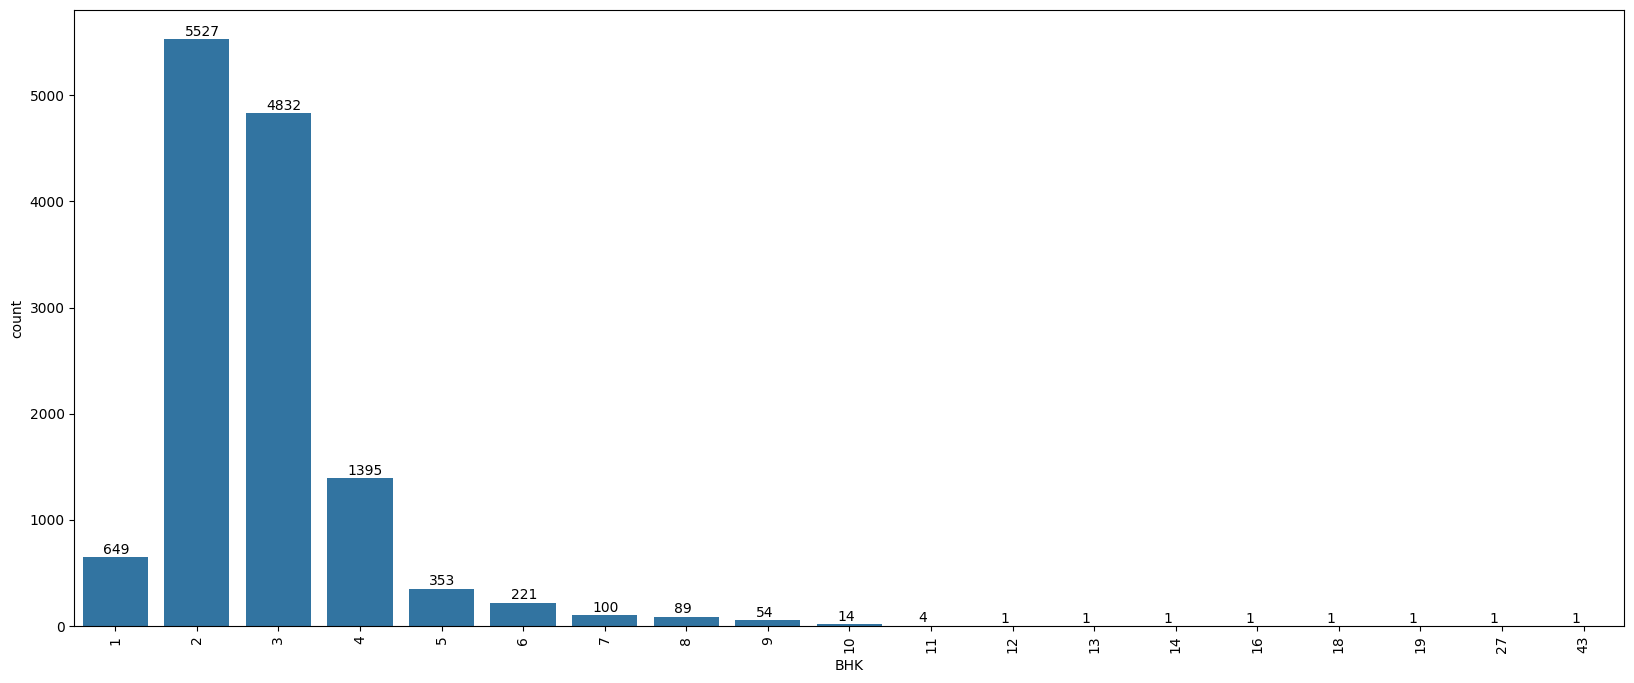

In [18]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'BHK', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

## Location

In [19]:
import re

location_with_numbers = df[df['location'].str.contains(r'\d', na=False)]
display(location_with_numbers['location'])

,location
12,7th Phase JP Nagar
36,Electronics City Phase 1
137,8th Phase JP Nagar
185,8th block Koramangala
210,1st Block Jayanagar
...,...
13233,7th Block Jayanagar
13234,7th Phase JP Nagar
13242,8th Phase JP Nagar
13245,12th cross srinivas nagar banshankari 3rd stage


In [20]:
# display values with location "Electronic City"
electronic_city_rows = df[df['location'].str.contains('Electronic City', na=False)]
display(electronic_city_rows['location'])

,location
0,Electronic City Phase II
26,Electronic City
29,Electronic City
91,Electronic City
113,Electronic City
...,...
13185,Electronic City
13222,Electronic City
13241,Electronic City Phase II
13269,Electronic City


In [21]:
jpnagar_rows = df[df['location'].str.contains('JP Nagar', na=False)]
display(jpnagar_rows['location'])

,location
12,7th Phase JP Nagar
137,8th Phase JP Nagar
226,7th Phase JP Nagar
252,7th Phase JP Nagar
281,7th Phase JP Nagar
...,...
13123,9th Phase JP Nagar
13182,7th Phase JP Nagar
13234,7th Phase JP Nagar
13236,JP Nagar


In [22]:
# remove numbers mixed with location values
#import re

#def remove_numbers(text):
#    return re.sub(r'\d+', '', text)

#df['location'] = df['location'].apply(remove_numbers)

## Square Feet

In [23]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df[~df['total_sqft'].apply(isfloat)].head(15)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [26]:
df[~df['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [27]:
# function to convert non-float types to float values
def sqft_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
df['total_sqft']=df['total_sqft'].apply(sqft_to_num)

In [29]:
df.head(15)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


# Feature Engineering

In [30]:
# add a new column Price_per_sqft
df['Price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head(15)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [31]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

## Apply Dimensionality Reduction

### Location

In [32]:
df.location=df.location.apply(lambda x: x.strip())
location_count = df['location'].value_counts(ascending=False)
location_count

,count
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [33]:
# we remove location values whose count is less than a threshold
less_than_15_counts = location_count[location_count < 15]
print(less_than_15_counts)

location
Sultan Palaya                     14
Murugeshpalya                     14
1st Block Jayanagar               14
Jalahalli East                    14
NGR Layout                        14
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1107, dtype: int64


In [34]:
# location count less than 10
less_than_10_counts = location_count[location_count < 10]
print(less_than_10_counts)

location
2nd Phase JP Nagar                9
KUDLU MAIN ROAD                   9
4th Block Koramangala             9
Vignana Nagar                     9
Ejipura                           9
                                 ..
Vasantapura main road             1
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
Abshot Layout                     1
Name: count, Length: 1039, dtype: int64


In [35]:
df.shape

(13246, 7)

In [36]:
# remove location values whose count is less than 15
df.location=df.location.apply(lambda x: 'other' if x in less_than_15_counts else x)
len(df.location.unique())

187

In [37]:
df.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Square Feet

In [38]:
# discard values with sqft to BHK ratio is less than 300
df[df.total_sqft/df.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
df2 = df[~(df.total_sqft/df.BHK<300)]
df2.shape

(12502, 7)

## Outlier Removal

In [40]:
df2['Price_per_sqft'].describe()

,Price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [42]:
# remove outliers in Price_per_sqft from dataset
df2 = remove_pps_outliers(df2)
df2.shape

(10345, 7)

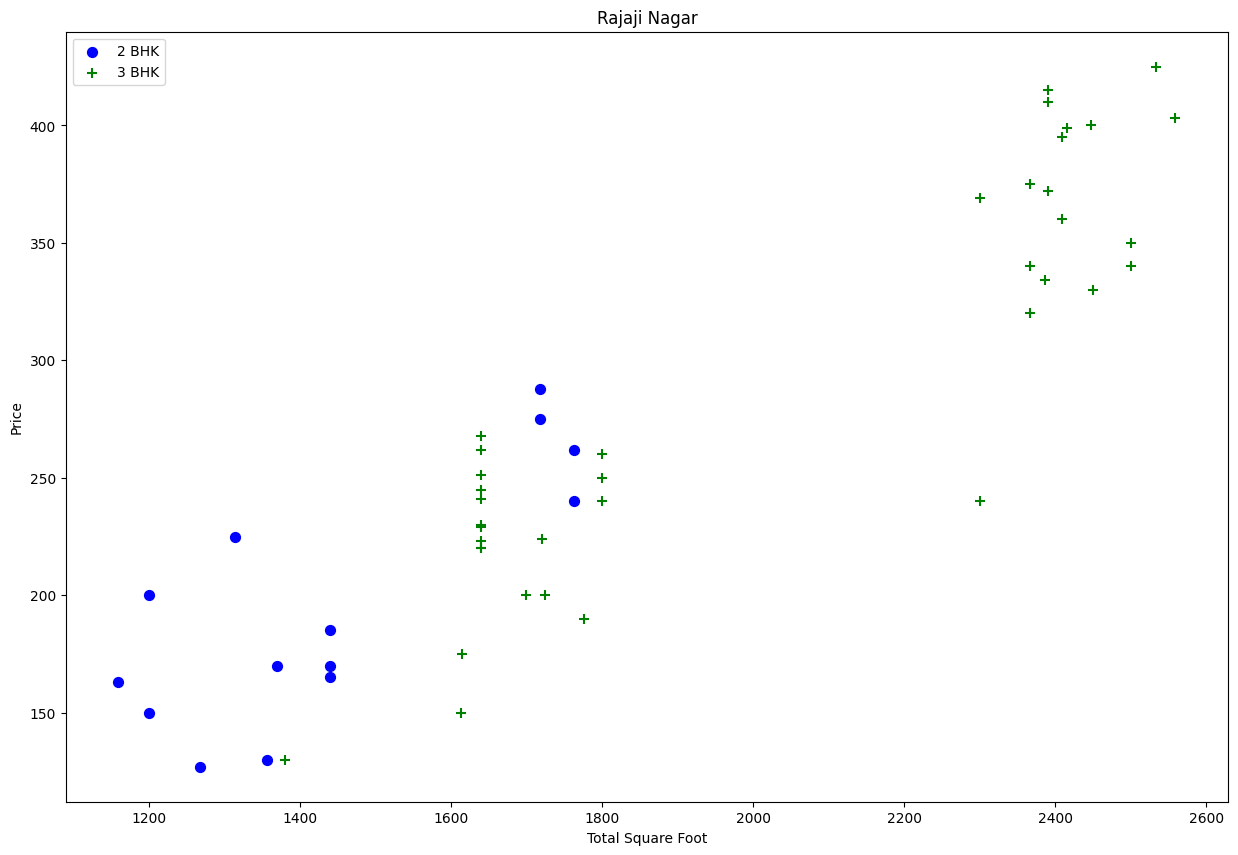

In [43]:
# visualizing total_sqft vs price for a given location
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df2,"Rajaji Nagar")

Text(0, 0.5, 'Count')

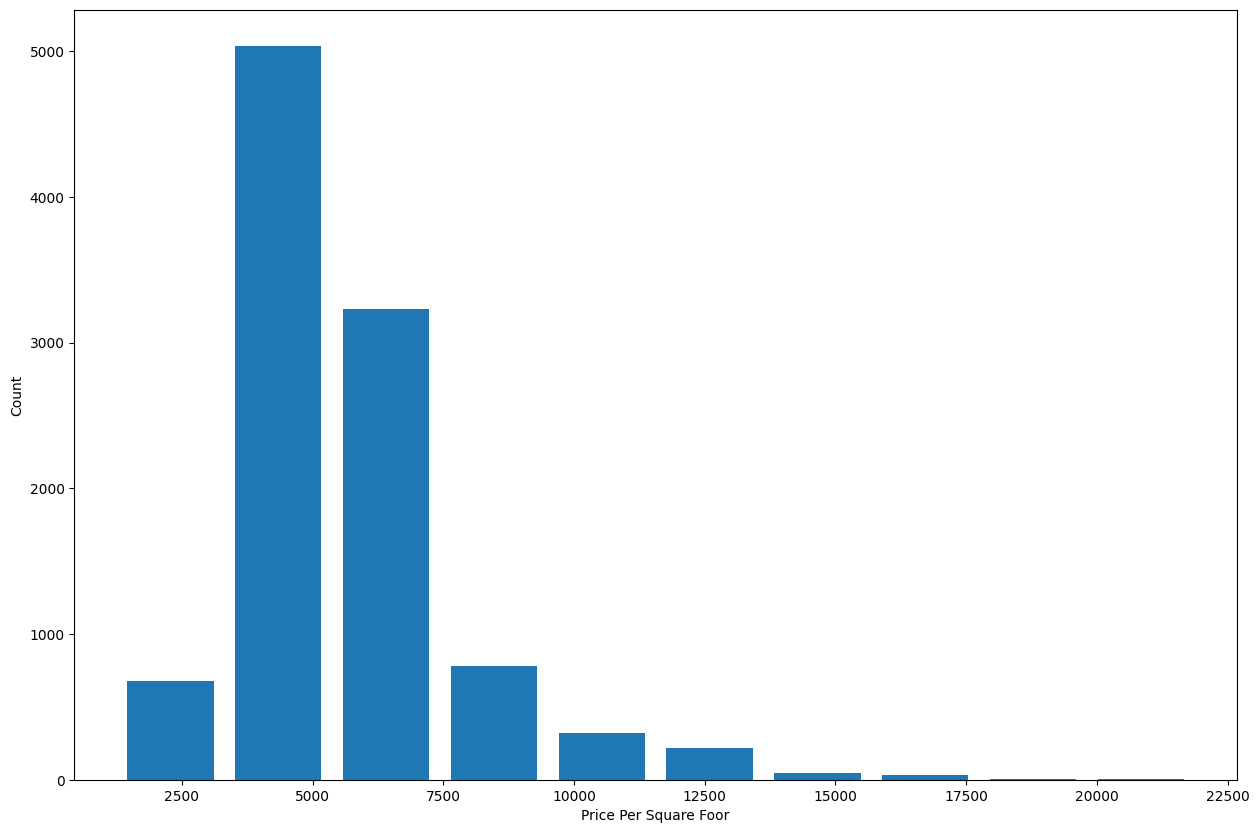

In [44]:
# plotting histogram for Price_per_sqft
plt.hist(df2.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

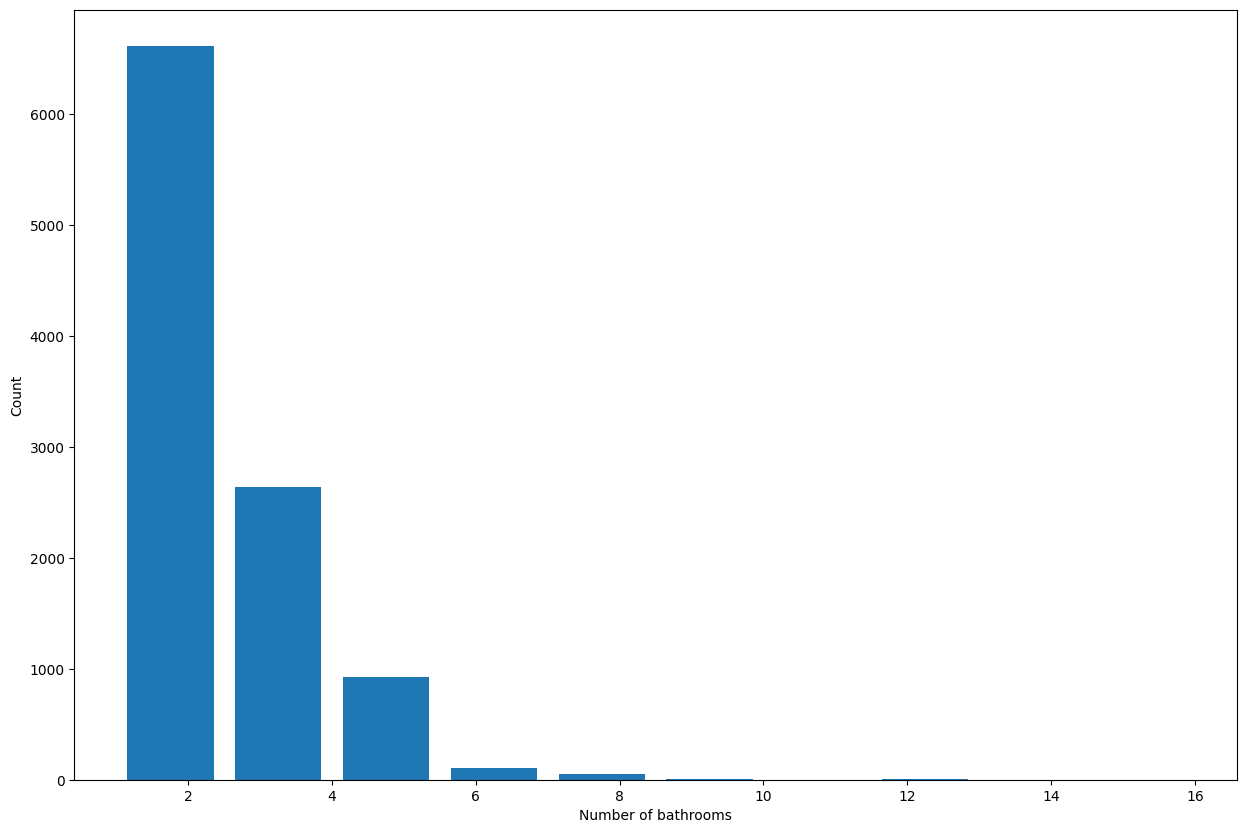

In [45]:
# plotting histogram for bathrooms
plt.hist(df2.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df2[df2.bath>10]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
8172,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8287,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9183,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9322,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9604,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


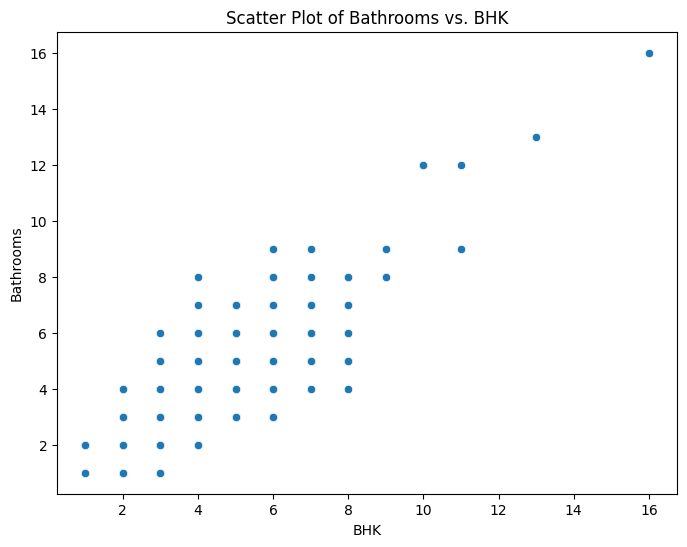

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BHK', y='bath', data=df2)
plt.title('Scatter Plot of Bathrooms vs. BHK')
plt.xlabel('BHK')
plt.ylabel('Bathrooms')
plt.show()

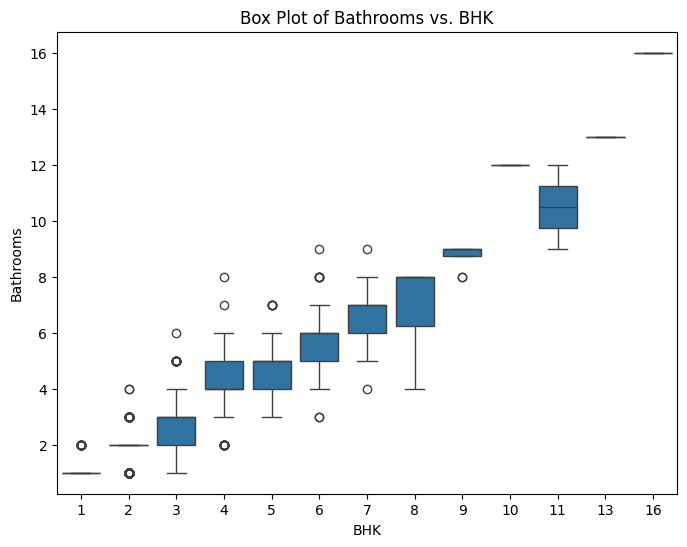

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='BHK', y='bath', data=df2)
plt.title('Box Plot of Bathrooms vs. BHK')
plt.xlabel('BHK')
plt.ylabel('Bathrooms')
plt.show()

In [49]:
# remove outliers in bath
# discard values with bath > BHK + 2
df2[df2.bath>df2.BHK+2]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
6306,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8073,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9129,other,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9914,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [50]:
df2.shape

(10345, 7)

In [51]:
df3 = df2[df2.bath<df2.BHK+2]
df3.shape

(10251, 7)

In [52]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
3,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
4,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996
5,1st Phase JP Nagar,3 BHK,2059.0,3.0,225.0,3,10927.634774
6,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148
7,1st Phase JP Nagar,2 BHK,1077.0,2.0,93.0,2,8635.097493
8,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,180.0,2,11494.252874
9,1st Phase JP Nagar,1 BHK,840.0,2.0,50.0,1,5952.380952


In [53]:
sample = df2[df2.bath==df2.BHK+2]
sample.shape

(90, 7)

# Dataset preparation

In [54]:
# use one-hot encoding for location
encoded_data = pd.get_dummies(df3['location'], dtype=int)
encoded_data.head(10)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df3 = pd.concat([df3,encoded_data.drop('other',axis='columns')],axis='columns')
df3.head()

,location,size,total_sqft,bath,price,BHK,Price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df3.shape

(10251, 193)

In [57]:
df4 = df3.drop(['location','size','Price_per_sqft'],axis='columns')
df4.head()

,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,157.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# df4['price'] = df['price'] * 100000

In [59]:
df4.head()

,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,157.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df4.shape

(10251, 190)

In [61]:
df4.isna().count()

,0
total_sqft,10251
bath,10251
price,10251
BHK,10251
1st Phase JP Nagar,10251
...,...
Whitefield,10251
Yelachenahalli,10251
Yelahanka,10251
Yelahanka New Town,10251


# Model Development

In [62]:
X = df4.drop('price', axis='columns')
X.head(10)

,total_sqft,bath,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1566.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,840.0,2.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y = df4.price

In [64]:
X = X[y.notna()]  # Keep rows in X where y is not NaN
X.shape

(10251, 189)

In [65]:
y.head()

,price
0,250.0
1,167.0
2,85.0
3,210.0
4,157.0


In [66]:
y = y[y.notna()]  # Keep rows in y where y is not NaN

In [67]:
y.shape

(10251,)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8182041666526279

In [71]:
# importance of each feature
feature_importance = pd.Series(lr.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

print(feature_importance)

Rajaji Nagar            157.970388
Benson Town             144.027093
2nd Stage Nagarbhavi    137.183238
Malleshwaram            135.123081
Cooke Town              107.635456
                           ...    
Sector 2 HSR Layout       0.337436
Kathriguppe               0.218598
Kasturi Nagar             0.135867
Billekahalli              0.121463
total_sqft                0.074077
Length: 189, dtype: float64


In [72]:
# use K-fold cross validation to evaluate the model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80733892, 0.83417905, 0.75583576, 0.75545533, 0.79312854])

## Evaluation of algorithms



### Lasso and ElasticNet

In [73]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_distributions = {
    'lasso': {
        'alpha': uniform(0.01, 10),
    },
    'elasticnet': {
        'alpha': uniform(0.01, 10),
        'l1_ratio': uniform(0.1, 0.9),
    }
}

# initialize models
models = {
    'lasso': Lasso(max_iter=1000, random_state=42),
    'elasticnet': ElasticNet(max_iter=1000, random_state=42)
}

results = []
for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        n_iter=30,  # random samples
        scoring='neg_mean_squared_error',
        cv=3,  # 3-fold cross-validation
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = -random_search.best_score_
    best_params = random_search.best_params_

    results.append({
        'model': model_name,
        'best_score': best_score,
        'best_params': best_params
    })

Running RandomizedSearchCV for lasso...
Running RandomizedSearchCV for elasticnet...


In [75]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

        model   best_score                                        best_params
0       lasso  1558.389221                     {'alpha': 0.21584494295802448}
1  elasticnet  1653.227386  {'alpha': 0.21584494295802448, 'l1_ratio': 0.9...


In [77]:
from tabulate import tabulate

table = []
for result in results:
    table.append([result['model'], result['best_score'], result['best_params']])

print(tabulate(table, headers=['Model', 'Best Score', 'Best Parameters'], tablefmt='grid'))

+------------+--------------+----------------------------------------------------------------+
| Model      |   Best Score | Best Parameters                                                |
+============+==============+================================================================+
| lasso      |      1558.39 | {'alpha': 0.21584494295802448}                                 |
+------------+--------------+----------------------------------------------------------------+
| elasticnet |      1653.23 | {'alpha': 0.21584494295802448, 'l1_ratio': 0.9729188669457949} |
+------------+--------------+----------------------------------------------------------------+


Rajaji Nagar                125.657025
Malleshwaram                 91.537926
Indira Nagar                 41.630074
Koramangala                  21.674664
bath                          7.226303
                               ...    
Electronic City              -1.461505
Uttarahalli                  -1.836306
Electronic City Phase II     -4.096131
Raja Rajeshwari Nagar        -6.907202
BHK                          -7.157548
Length: 189, dtype: float64


<Axes: title={'center': 'Feature Importance (Lasso)'}>

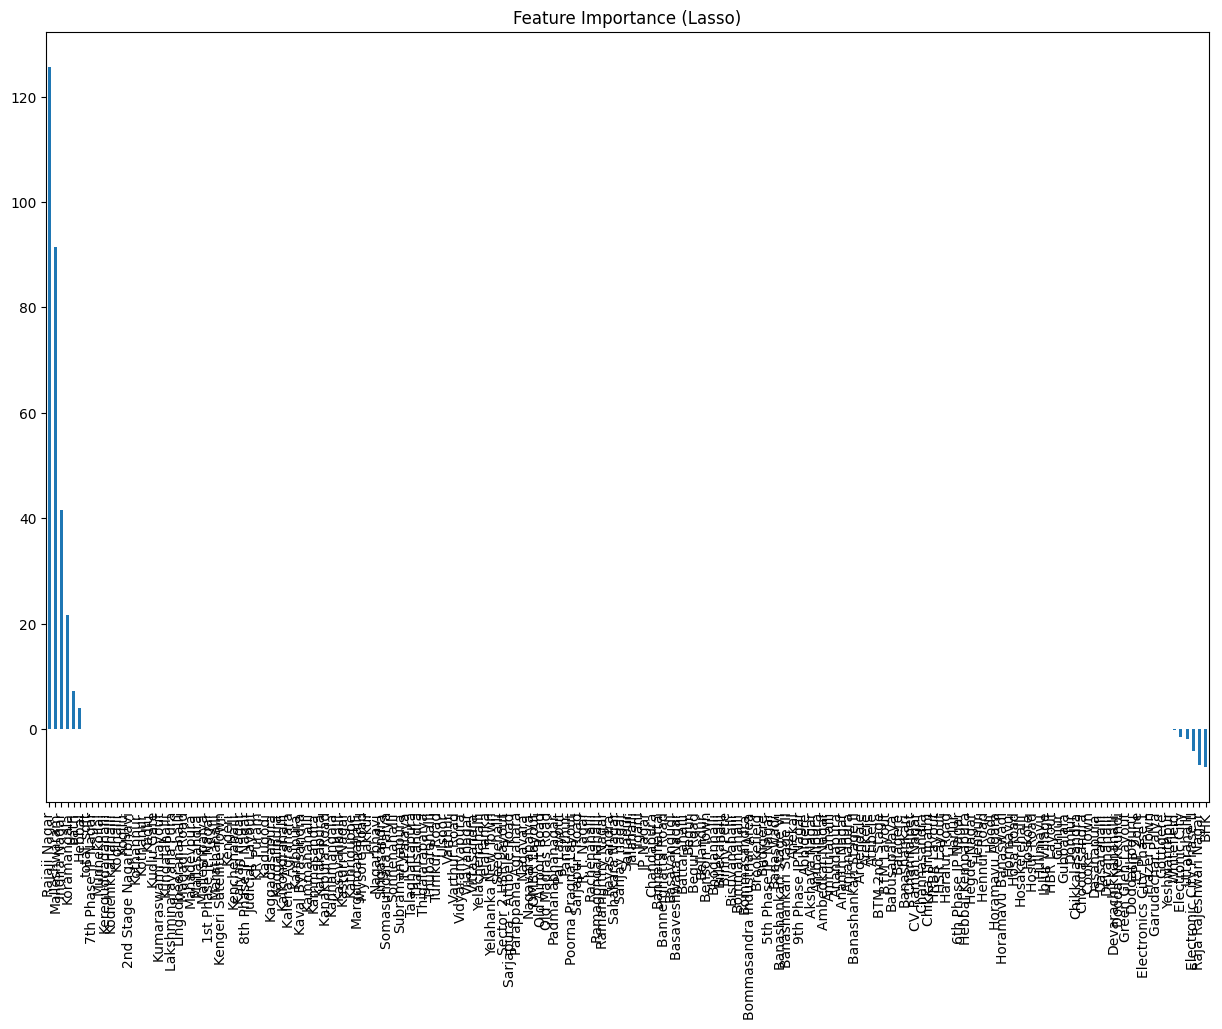

In [78]:
lasso_model = Lasso(alpha=0.21584494295802448)
lasso_model.fit(X_train, y_train)

feature_importance = pd.Series(lasso_model.coef_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

feature_importance.plot(kind='bar', title='Feature Importance (Lasso)')

In [80]:
# cross-validate Lasso with ElasticNet
from sklearn.model_selection import cross_val_score

# Lasso
lasso_cv_scores = cross_val_score(Lasso(alpha=0.21584494295802448), X, y, cv=5, scoring='neg_mean_squared_error')
print("Lasso CV Mean MSE:", -lasso_cv_scores.mean())

# ElasticNet
elasticnet_cv_scores = cross_val_score(ElasticNet(alpha=0.21584494295802448, l1_ratio=0.9729188669457949), X, y, cv=5, scoring='neg_mean_squared_error')
print("ElasticNet CV Mean MSE:", -elasticnet_cv_scores.mean())

Lasso CV Mean MSE: 1822.0875975065842
ElasticNet CV Mean MSE: 1825.5556496236263


In [82]:
# refine hyperparameters for both models
from sklearn.model_selection import train_test_split, GridSearchCV
# Lasso Grid Search
lasso_grid = {'alpha': np.linspace(0.21584494295802448 * 0.8, 0.21584494295802448 * 1.2, 10)}
lasso_refined = GridSearchCV(Lasso(), lasso_grid, scoring='neg_mean_squared_error', cv=5)
lasso_refined.fit(X_train, y_train)

# ElasticNet Grid Search
elasticnet_grid = {
    'alpha': np.linspace(0.21584494295802448 * 0.8, 0.21584494295802448 * 1.2, 10),
    'l1_ratio': np.linspace(0.9729188669457949 * 0.8, 0.9729188669457949 * 1.2, 5)
}
elasticnet_refined = GridSearchCV(ElasticNet(), elasticnet_grid, scoring='neg_mean_squared_error', cv=5)
elasticnet_refined.fit(X_train, y_train)

print("Lasso Best Alpha:", lasso_refined.best_params_['alpha'])
print("Lasso Refined MSE:", -lasso_refined.best_score_)

print("ElasticNet Best Params:", elasticnet_refined.best_params_)
print("ElasticNet Refined MSE:", -elasticnet_refined.best_score_)

Lasso Best Alpha: 0.17267595436641958
Lasso Refined MSE: 1520.6976766775188
ElasticNet Best Params: {'alpha': 0.17267595436641958, 'l1_ratio': 0.9729188669457949}
ElasticNet Refined MSE: 1606.6806448572024


In [89]:
# analyze feature coefficients
lasso_model = Lasso(alpha=lasso_refined.best_params_['alpha'])
lasso_model.fit(X_train, y_train)

# feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                      Feature  Coefficient
156              Rajaji Nagar   132.739227
137              Malleshwaram   100.942512
94               Indira Nagar    55.323903
124               Koramangala    29.777973
68                Frazer Town     7.915811
..                        ...          ...
65            Electronic City    -3.040525
178               Uttarahalli    -4.567601
2                         BHK    -7.327533
66   Electronic City Phase II    -7.746167
155     Raja Rajeshwari Nagar    -9.468779

[189 rows x 2 columns]


In [90]:
elasticnet_model = ElasticNet(alpha=elasticnet_refined.best_params_['alpha'], l1_ratio=elasticnet_refined.best_params_['l1_ratio'])
elasticnet_model.fit(X_train, y_train)

ElasticNet(alpha=0.17267595436641958, l1_ratio=0.9729188669457949)

In [85]:
# evaluate the ensemble of Lasso and ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# ensemble model
lasso_model = Lasso(alpha=lasso_refined.best_params_['alpha'])
elasticnet_model = ElasticNet(**elasticnet_refined.best_params_)

voting_ensemble = VotingRegressor([('lasso', lasso_model), ('elasticnet', elasticnet_model)])
voting_ensemble.fit(X_train, y_train)

ensemble_mse = mean_squared_error(y_test, voting_ensemble.predict(X_test))
print("Ensemble MSE:", ensemble_mse)

Ensemble MSE: 1526.308064341035


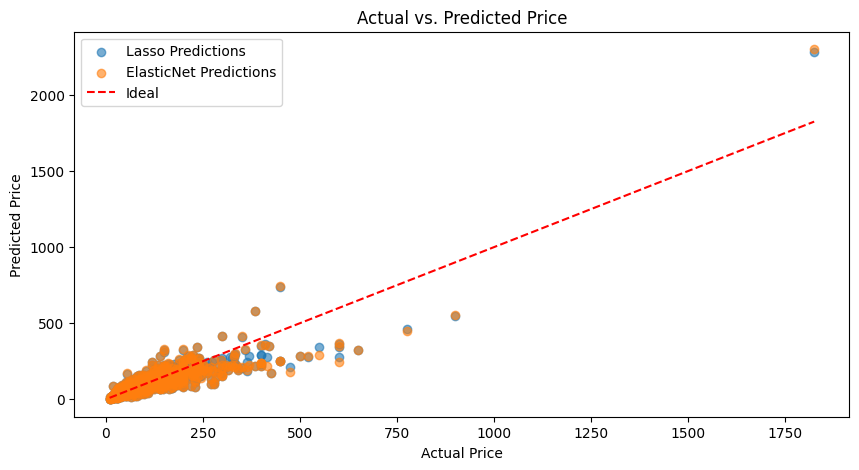

In [91]:
# visualize actual vs predicted prices by the model
import matplotlib.pyplot as plt

# Predictions
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label='Lasso Predictions')
plt.scatter(y_test, y_pred_elasticnet, alpha=0.6, label='ElasticNet Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.legend()
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

### Random Forest and SVR

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

svr_model = SVR(kernel='rbf', C=10, gamma='scale')
svr_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print("Random Forest:")
print(f"  MSE: {rf_mse:.2f}")
print(f"  R² Score: {rf_r2:.4f}")

print("\nSupport Vector Regressor:")
print(f"  MSE: {svr_mse:.2f}")
print(f"  R² Score: {svr_r2:.4f}")

Random Forest:
  MSE: 1257.99
  R² Score: 0.8099

Support Vector Regressor:
  MSE: 3147.07
  R² Score: 0.5245


In [96]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Random Forest metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Lasso metrics
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Random Forest:")
print(f"  MSE: {rf_mse:.2f}, R²: {rf_r2:.4f}")

print("\nLasso:")
print(f"  MSE: {lasso_mse:.2f}, R²: {lasso_r2:.4f}")

Random Forest:
  MSE: 1257.99, R²: 0.8099

Lasso:
  MSE: 1480.00, R²: 0.7764


### Boosting Algorithms

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "MSE": mse,
        "R²": r2
    })

results_df = pd.DataFrame(results)
print(results_df)

Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 8200, number of used features: 95
[LightGBM] [Info] Start training from score 88.081243
Training Gradient Boosting...
               Model          MSE        R²
0            XGBoost   967.221359  0.853860
1           LightGBM  2058.424575  0.688987
2  Gradient Boosting  1155.245713  0.825451


### All Regression Algorithms

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from xgboost import XGBRegressor
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'LightGBM': lgb.LGBMRegressor(),
    'XGBoost': XGBRegressor()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'MSE': mse,
        'R²': r2
    })

# display the results in tabulated format
table = []
for result in results:
    table.append([result['Model'], result['MSE'], result['R²']])

print(tabulate(table, headers=['Model', 'MSE', 'R²'], tablefmt='grid'))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 8200, number of used features: 95
[LightGBM] [Info] Start training from score 88.081243
+-------------------+----------+----------+
| Model             |      MSE |       R² |
+===================+==========+==========+
| Lasso             | 1851.06  | 0.720319 |
+-------------------+----------+----------+
| ElasticNet        | 1850.08  | 0.720466 |
+-------------------+----------+----------+
| Random Forest     | 1293.79  | 0.804518 |
+-------------------+----------+----------+
| Linear Regression | 1203.21  | 0.818204 |
+-------------------+----------+----------+
| Gradient Boosting | 1167.14  | 0.823654 |
+-------------------+----------+----------+
| SVR  

In [114]:
# ensemble of best three performing models
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

xgb_model = XGBRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()
ensemble_model = VotingRegressor(estimators=[('XGBoost', xgb_model),
                                             ('Gradient Boosting', gb_model),
                                             ('Linear Regression', lr_model)])

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model MSE: {mse_ensemble:.2f}")
print(f"Ensemble Model R²: {r2_ensemble:.4f}")

Ensemble Model MSE: 1021.07
Ensemble Model R²: 0.8457


In [113]:
# ensemble using voting regressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
ensemble_model = VotingRegressor(estimators=[('XGBoost', xgb_model),
                                              ('Gradient Boosting', gb_model)])

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ensemble Model MSE: {mse}')
print(f'Ensemble Model R²: {r2}')

Ensemble Model MSE: 1084.27524210758
Ensemble Model R²: 0.836174115709338


In [112]:
# ensemble using stacking regressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

stacking_model = StackingRegressor(estimators=[('XGBoost', xgb_model),
                                                ('Gradient Boosting', gb_model)],
                                   final_estimator=LinearRegression())

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking Ensemble Model MSE: {mse_stack}')
print(f'Stacking Ensemble Model R²: {r2_stack}')

Stacking Ensemble Model MSE: 1066.1162033267742
Stacking Ensemble Model R²: 0.8389178107330769


**XGBoost is the best performing algorithm with MSE (Mean Squared Error) of 967.221 and R² score of 0.85386**

## Final model Training

In [121]:
import xgboost as xgb

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgboost_model = xgb.XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)

In [124]:
# calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"XGBoost Model MSE: {mse}")
print(f"XGBoost Model RMSE: {rmse}")
print(f"XGBoost Model MAE: {mae}")
print(f"XGBoost Model R²: {r2}")
print(f"XGBoost Model Explained Variance: {explained_variance}")

XGBoost Model MSE: 967.2213585030604
XGBoost Model RMSE: 31.100182612053267
XGBoost Model MAE: 16.989614043772832
XGBoost Model R²: 0.8538600825620829
XGBoost Model Explained Variance: 0.8538651262844651


In [129]:
# custom test function
import numpy as np

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return xgboost_model.predict([x])[0] * 100000

In [131]:
location = 'Vijayanagar'
sqft = 1500
bath = 2
bhk = 3

# Make a prediction
predicted_price = predict_price(location, sqft, bath, bhk)
print(f"The predicted price for the property is: ₹ {predicted_price}")

The predicted price for the property is: ₹ 8743955.993652344


In [132]:
import joblib
joblib.dump(xgboost_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

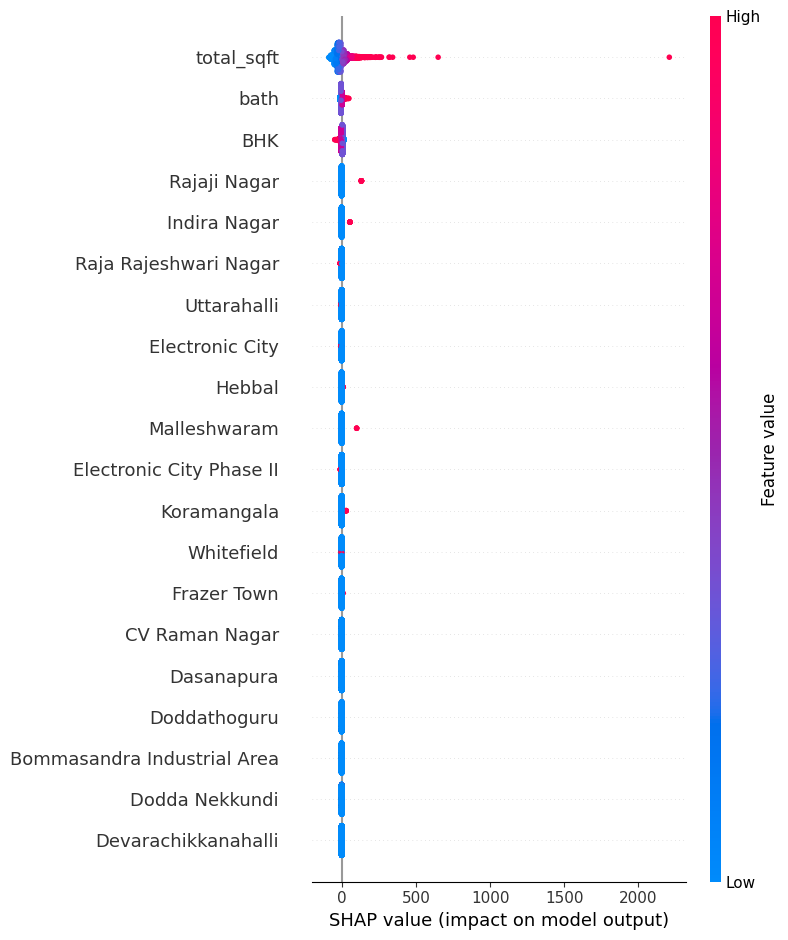

In [92]:
import shap

explainer = shap.Explainer(lasso_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)